In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy


In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities. To store cities names
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list. Ask Igben
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    #if (i % 50 == 0 and i >= 50):
        #set_count += 1
        #record_count = 1
    # Create endpoint URL with each city.
    #city_url = url + "&q=" + cities[i]

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city. Ask igben
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities. Ask Igben
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | puerto escondido
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | puerto del rosario
Processing Record 5 of Set 1 | paamiut
Processing Record 6 of Set 1 | clyde river
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | bartica
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | sainte-thecle
Processing Record 15 of Set 1 | riviere-au-renard
Processing Record 16 of Set 1 | kavieng
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | aksu
Processing Record 19 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 1 | kormilovka
Processing Record 21 of Set 1 | victoria
Processing Record 22 of 

Processing Record 39 of Set 4 | soyo
Processing Record 40 of Set 4 | san ramon
Processing Record 41 of Set 4 | vila do maio
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | saint george
Processing Record 44 of Set 4 | sataua
City not found. Skipping...
Processing Record 45 of Set 4 | roshchino
Processing Record 46 of Set 4 | naze
Processing Record 47 of Set 4 | te anau
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | sola
Processing Record 50 of Set 4 | borgosesia
Processing Record 1 of Set 5 | lorengau
Processing Record 2 of Set 5 | paracuru
Processing Record 3 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 4 of Set 5 | les cayes
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | banjarmasin
Processing Record 7 of Set 5 | baykit
Processing Record 8 of Set 5 | czluchow
Processing Record 9 of Set 5 | mayo
Processing Record 10 of Set 5 | carbonia
Processing Record 11 of Set 5 | tallahassee
Processin

Processing Record 27 of Set 8 | aguimes
Processing Record 28 of Set 8 | semirom
Processing Record 29 of Set 8 | durban
Processing Record 30 of Set 8 | saint-augustin
Processing Record 31 of Set 8 | sabang
Processing Record 32 of Set 8 | gairo
Processing Record 33 of Set 8 | upata
Processing Record 34 of Set 8 | kaitangata
Processing Record 35 of Set 8 | bria
Processing Record 36 of Set 8 | tigzirt
Processing Record 37 of Set 8 | seymchan
Processing Record 38 of Set 8 | balkanabat
Processing Record 39 of Set 8 | phuket
Processing Record 40 of Set 8 | tarakan
Processing Record 41 of Set 8 | tazovskiy
Processing Record 42 of Set 8 | cabedelo
Processing Record 43 of Set 8 | roblin
Processing Record 44 of Set 8 | champerico
Processing Record 45 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 46 of Set 8 | leshukonskoye
Processing Record 47 of Set 8 | matamoros
Processing Record 48 of Set 8 | mecca
Processing Record 49 of Set 8 | vastervik
City not found. Skipping...
Proces

Processing Record 17 of Set 12 | khrebtovaya
Processing Record 18 of Set 12 | joshimath
Processing Record 19 of Set 12 | pangai
Processing Record 20 of Set 12 | sao felix do xingu
Processing Record 21 of Set 12 | nishihara
Processing Record 22 of Set 12 | meulaboh
Processing Record 23 of Set 12 | lalomanu
City not found. Skipping...
Processing Record 24 of Set 12 | vung tau
Processing Record 25 of Set 12 | den helder
Processing Record 26 of Set 12 | sri aman
Processing Record 27 of Set 12 | santa marta
Processing Record 28 of Set 12 | meadow lake
Processing Record 29 of Set 12 | tromso
Processing Record 30 of Set 12 | diego de almagro
Processing Record 31 of Set 12 | turbat
Processing Record 32 of Set 12 | acarau
Processing Record 33 of Set 12 | seydi
Processing Record 34 of Set 12 | ornes
Processing Record 35 of Set 12 | minsk mazowiecki
Processing Record 36 of Set 12 | wattegama
Processing Record 37 of Set 12 | carahue
Processing Record 38 of Set 12 | fort nelson
Processing Record 39

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,67.55,76,43,12.66,RE,2021-07-23 03:23:27
1,Puerto Escondido,15.8500,-97.0667,79.63,69,75,0.00,MX,2021-07-23 03:23:28
2,Rikitea,-23.1203,-134.9692,73.74,74,4,19.84,PF,2021-07-23 03:20:09
3,Puerto Del Rosario,28.5004,-13.8627,73.15,68,13,20.71,ES,2021-07-23 03:23:28
4,Paamiut,61.9940,-49.6678,42.01,92,100,2.35,GL,2021-07-23 03:23:29
5,Clyde River,70.4692,-68.5914,35.83,100,90,5.75,CA,2021-07-23 03:23:29
6,Hilo,19.7297,-155.0900,74.93,90,90,5.75,US,2021-07-23 03:23:29
7,Bredasdorp,-34.5322,20.0403,38.52,93,99,4.61,ZA,2021-07-23 03:23:30
8,Thompson,55.7435,-97.8558,75.36,69,75,3.44,CA,2021-07-23 03:23:30
9,Ushuaia,-54.8000,-68.3000,38.86,81,75,9.22,AR,2021-07-23 03:23:30


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-07-23 03:23:27,-21.3585,55.7679,67.55,76,43,12.66
1,Puerto Escondido,MX,2021-07-23 03:23:28,15.8500,-97.0667,79.63,69,75,0.00
2,Rikitea,PF,2021-07-23 03:20:09,-23.1203,-134.9692,73.74,74,4,19.84
3,Puerto Del Rosario,ES,2021-07-23 03:23:28,28.5004,-13.8627,73.15,68,13,20.71
4,Paamiut,GL,2021-07-23 03:23:29,61.9940,-49.6678,42.01,92,100,2.35
5,Clyde River,CA,2021-07-23 03:23:29,70.4692,-68.5914,35.83,100,90,5.75
6,Hilo,US,2021-07-23 03:23:29,19.7297,-155.0900,74.93,90,90,5.75
7,Bredasdorp,ZA,2021-07-23 03:23:30,-34.5322,20.0403,38.52,93,99,4.61
8,Thompson,CA,2021-07-23 03:23:30,55.7435,-97.8558,75.36,69,75,3.44
9,Ushuaia,AR,2021-07-23 03:23:30,-54.8000,-68.3000,38.86,81,75,9.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


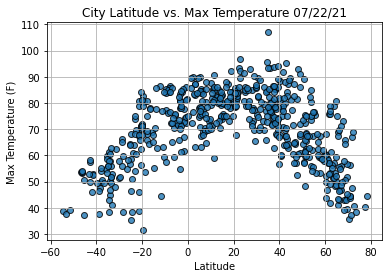

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

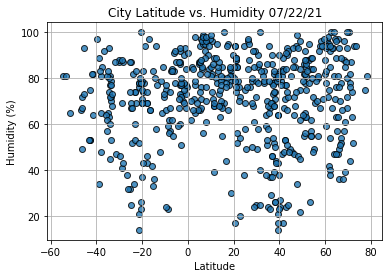

In [22]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

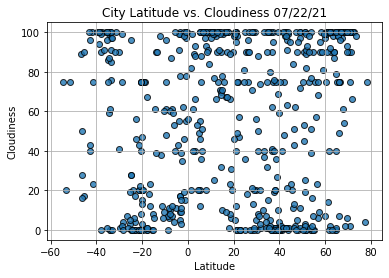

In [20]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

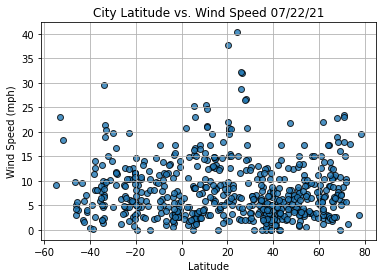

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()